In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/NeuralNetwork/data.zip > /dev/null

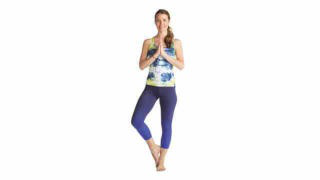

In [ ]:
import tensorflow as tf
img = tf.keras.preprocessing.image.load_img('data/Train/Yoga_236.jpg')
img


In [ ]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])


In [ ]:
import os
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
from random import shuffle

train_data = []

for i in os.listdir('/content/data/Train'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Train',i),target_size =(227,227,3))
  img = tf.keras.utils.img_to_array(img)

  augmented_image = data_augmentation(img)
  augmented_image =tf.keras.utils.img_to_array(augmented_image)

  image_label = i.split('_')[0]

  train_data.append((img, image_label))
  train_data.append((augmented_image, image_label))


shuffle(train_data)

train_images = []
train_labels = []

for i in range(len(train_data)):
  train_images.append(train_data[i][0])
  train_labels.append(train_data[i][1])

classes = ["Basketball", "Football", "Rowing", "Swimming", "Tennis", "Yoga"]

mapping = {}
for i in range(len(classes)):
  mapping[classes[i]] = i

# integer representation
for i in range(len(train_labels)):
  train_labels[i] = mapping[train_labels[i]]

encoded_labels = to_categorical(train_labels)

train_images = np.array(train_images) 


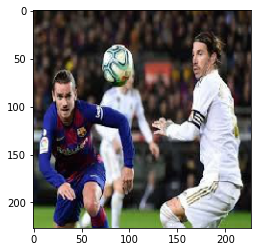

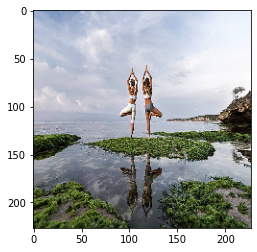

[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]


In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[9].astype('uint8'))
plt.show()
plt.imshow(train_images[8].astype('uint8'))
plt.show()
print(encoded_labels[9])
print(encoded_labels[8])



In [ ]:
import os

test_images = []
test_images_names = []
for i in os.listdir('/content/data/Test'):
  img = tf.keras.preprocessing.image.load_img(os.path.join('/content/data/Test',i),target_size =(227,227,3))
  img = tf.keras.utils.img_to_array(img)
  test_images.append(img)
  test_images_names.append(i)

test_images = np.array(test_images) 

In [ ]:
for i in encoded_labels:
  print(i)

[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 1.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0.]


In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096, input_shape=(227,227,3,)))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting
AlexNet.add(Dropout(0.5))

#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#3rd Fully Connected Layer
AlexNet.add(Dense(1000))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout
AlexNet.add(Dropout(0.5))

#Output Layer
AlexNet.add(Dense(6))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('softmax'))

#Model Summary
AlexNet.compile(loss = keras.losses.categorical_crossentropy, optimizer= 'adam', metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 57, 57, 96)        34944     
                                                                 
 batch_normalization_9 (Batc  (None, 57, 57, 96)       384       
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 57, 57, 96)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 29, 29, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 29, 29, 256)       614656    
                                                                 
 batch_normalization_10 (Bat  (None, 29, 29, 256)     

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(patience=3,monitor='val_loss',restore_best_weights=True)

AlexNet.fit(train_images, encoded_labels, epochs = 25, validation_split=0.2, batch_size = 64, steps_per_epoch = train_images.shape[0]//64, callbacks = [early_stop])

Epoch 1/25
52/52 [==============================] - 666s 13s/step - loss: 1.0209 - accuracy: 0.6695 - val_loss: 41.9426 - val_accuracy: 0.1218
Epoch 2/25
52/52 [==============================] - 665s 13s/step - loss: 0.7443 - accuracy: 0.7951 - val_loss: 5.5355 - val_accuracy: 0.1649
Epoch 3/25
52/52 [==============================] - 665s 13s/step - loss: 0.6162 - accuracy: 0.8508 - val_loss: 1.5058 - val_accuracy: 0.4264
Epoch 4/25
52/52 [==============================] - 662s 13s/step - loss: 0.5188 - accuracy: 0.8913 - val_loss: 0.7170 - val_accuracy: 0.8217
Epoch 5/25
52/52 [==============================] - 647s 12s/step - loss: 0.4277 - accuracy: 0.9279 - val_loss: 1.3489 - val_accuracy: 0.5290
Epoch 6/25
52/52 [==============================] - 660s 13s/step - loss: 0.3624 - accuracy: 0.9473 - val_loss: 0.5187 - val_accuracy: 0.8826
Epoch 7/25
52/52 [==============================] - 659s 13s/step - loss: 0.3054 - accuracy: 0.9639 - val_loss: 0.4548 - val_accuracy: 0.8960
Epoch

In [ ]:
AlexNet.history.history

{}

In [ ]:
y_predictions = AlexNet.predict(test_images)
print(y_predictions)

22/22 [==============================] - 38s 2s/step
[[0.03993201 0.05902414 0.04908388 0.7631044  0.03650713 0.05234851]
 [0.03441095 0.02530983 0.02142009 0.02569784 0.02444467 0.8687166 ]
 [0.07593548 0.0400355  0.04150574 0.03941043 0.04380266 0.7593102 ]
 ...
 [0.11332376 0.3592967  0.07829567 0.06487423 0.08625422 0.29795548]
 [0.03377445 0.03309325 0.02868912 0.6995411  0.1632842  0.04161788]
 [0.41699502 0.26805    0.04497639 0.03776209 0.16683209 0.06538448]]


In [ ]:
result = []
for i in y_predictions:
  result.append(np.argmax(i))

import csv
with open('result.csv', 'w', newline='') as csv_file:
      fieldnames = ['image_name', 'label']
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
      writer.writeheader()
      for i in range(len(result)):
          writer.writerow({'image_name': test_images_names[i], 'label': result[i]})

In [ ]:
AlexNet.save('AlexNet.h5')